<a href="https://colab.research.google.com/github/AyazHasanov/Python_Data_Analysis_Projects/blob/main/Copy_of_Goodreads_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing relevant packages for data analysis

# data file source: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Uploading the file and reading its content to have some understanding

# head() function is ued to review first rows quickly
# shape function shows rows and columns - it shows we have 11127 rows and 13 columns

df = pd.read_csv('books.csv')
print(df.head())
print(df.shape)

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating        isbn       isbn13  \
0  J.K. Rowling/Mary GrandPré           4.57   439785960  9.78044E+12   
1  J.K. Rowling/Mary GrandPré           4.49   439358078  9.78044E+12   
2                J.K. Rowling           4.42   439554896  9.78044E+12   
3  J.K. Rowling/Mary GrandPré           4.56  043965548X  9.78044E+12   
4  J.K. Rowling/Mary GrandPré           4.78   439682584  9.78044E+12   

  language_code   num_pages  ratings_count  text_reviews_count  \
0           eng         652        2095690               27591   
1           eng         870        2153167  

In [ ]:
# As the first step of data analysis we can do some data cleaning to check missing or duplicated data and etc.


# Check for missing values
missing_values = df.isnull().sum()
missing_values


,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [ ]:
# missing_values series shows that last column (unnames: 12) contains 11.124 missing values (out of 11127 rows )
# so it can be dropped to have clean dataset

cleaned_data = df.drop(columns=['Unnamed: 12'], errors='ignore')

cleaned_data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
# Now cleaned_data shows not any missing values

missing_values = cleaned_data.isnull().sum()
missing_values



,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [ ]:
# Check for duplicate rows and result shows there is not any duplicated values
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
# to see which columns have data type and making conversion where necessary

# below columns show that average_rating, num_pages can be converted to numeric data type, punlication_date can be converted to date column

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11126 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [ ]:
# Convert 'publication_date' to datetime
cleaned_data['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Convert 'average_rating' to numeric, handling any errors
cleaned_data['average_rating'] = pd.to_numeric(cleaned_data['average_rating'], errors='coerce')

# Strip any leading or trailing spaces from column names, because above num_pages column has trailing space
cleaned_data.columns = cleaned_data.columns.str.strip()

# Convert 'num_pages' to numeric, handling any errors
cleaned_data['num_pages'] = pd.to_numeric(cleaned_data['num_pages'], errors='coerce')

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11127 non-null  int64         
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  object        
 6   language_code       11127 non-null  object        
 7   num_pages           11123 non-null  float64       
 8   ratings_count       11127 non-null  int64         
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11126 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
# Results summary
{
    "Missing Values": missing_values,
    "Duplicate Rows": duplicates,
    "Data Types After Cleaning": cleaned_data.dtypes,
    "Sample Data": cleaned_data.head()
}


{'Missing Values': bookID                0
 title                 0
 authors               0
 average_rating        0
 isbn                  0
 isbn13                0
 language_code         0
   num_pages           0
 ratings_count         0
 text_reviews_count    0
 publication_date      0
 publisher             1
 dtype: int64,
 'Duplicate Rows': 0,
 'Data Types After Cleaning': bookID                         int64
 title                         object
 authors                       object
 average_rating               float64
 isbn                          object
 isbn13                        object
 language_code                 object
 num_pages                    float64
 ratings_count                  int64
 text_reviews_count             int64
 publication_date      datetime64[ns]
 publisher                     object
 dtype: object,
 'Sample Data':    bookID                                              title  \
 0       1  Harry Potter and the Half-Blood Prince (Harry ...   

In [ ]:
# We can use describe() column for numeric columns to have some understanding

numeric_summary = cleaned_data[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']].describe()

numeric_summary

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112700e+04,11127.000000
mean,3.934075,336.405556,1.793649e+04,541.864474
std,0.350485,241.152626,1.124794e+05,2576.174610
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [ ]:
# Now after cleaning we can get some insights and visualize it accordingly

# 1. Explore Top-Rated Books
top_rated_books = cleaned_data.sort_values(by='average_rating', ascending=False).head(10)

top_rated_books.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.7802E+12,grc,364.0,0,0,1922-02-22,Oxford University Press USA
9897,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78159E+12,eng,240.0,2,0,2007-10-16,Multnomah
4790,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9.78189E+12,eng,74.0,5,3,2006-02-01,Square One Publishers
9328,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,786845031,9.78079E+12,eng,24.0,2,1,2003-02-01,Disney Press
9724,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9.78193E+12,eng,222.0,1,0,2003-07-25,Academica Press
4935,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,533017424,9.78053E+12,eng,202.0,4,0,1975-01-01,Vantage Press
6778,25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5.0,862431352,9.78086E+12,wel,150.0,1,0,1987-06-22,Y Lolfa
9286,36492,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0,1584655801,9.78158E+12,eng,179.0,1,1,2007-02-28,University Press of New England
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9.78383E+12,eng,83.0,1,0,2006-09-01,Schirmer Mosel
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.78074E+12,eng,128.0,2,0,2003-03-06,BradyGames


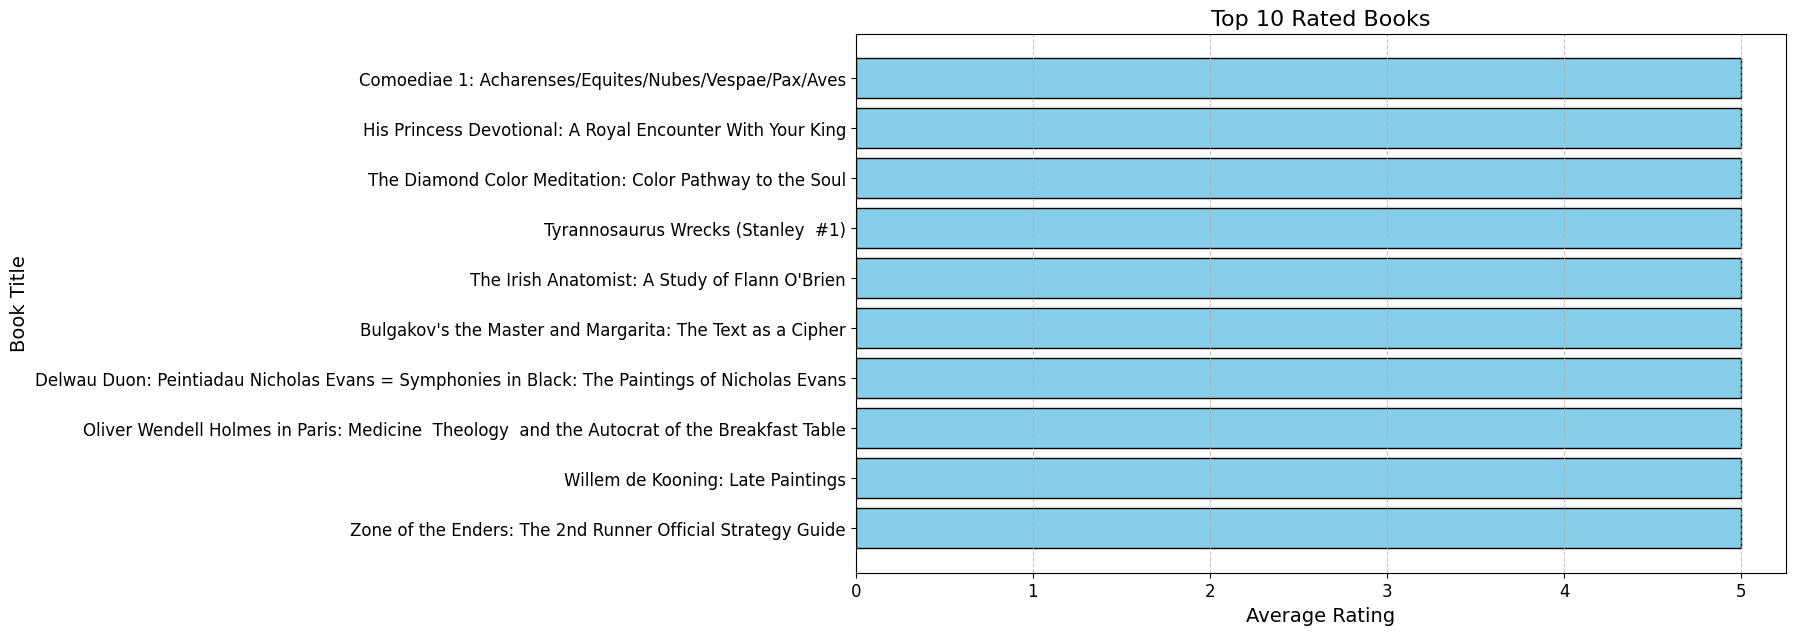

In [ ]:
# Top Rated Books
plt.figure(figsize=(12, 7))
plt.barh(top_rated_books['title'], top_rated_books['average_rating'], color='skyblue', edgecolor='black')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)
plt.title('Top 10 Rated Books', fontsize=16)
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 2. Analyze Publication Trends Over Time
publication_trends = cleaned_data['publication_date'].dt.year.value_counts().sort_index()

# Below code shows the peak number of books were sold at 2006 and upward trend
# started at 1985

number_of_books_per_year = cleaned_data['publication_date'].dt.year.value_counts().sort_values(ascending=False).head(25)
number_of_books_per_year

,count
publication_date,
2006.0,1700
2005.0,1260
2004.0,1069
2003.0,931
2002.0,798
2001.0,656
2000.0,533
2007.0,518
1999.0,450


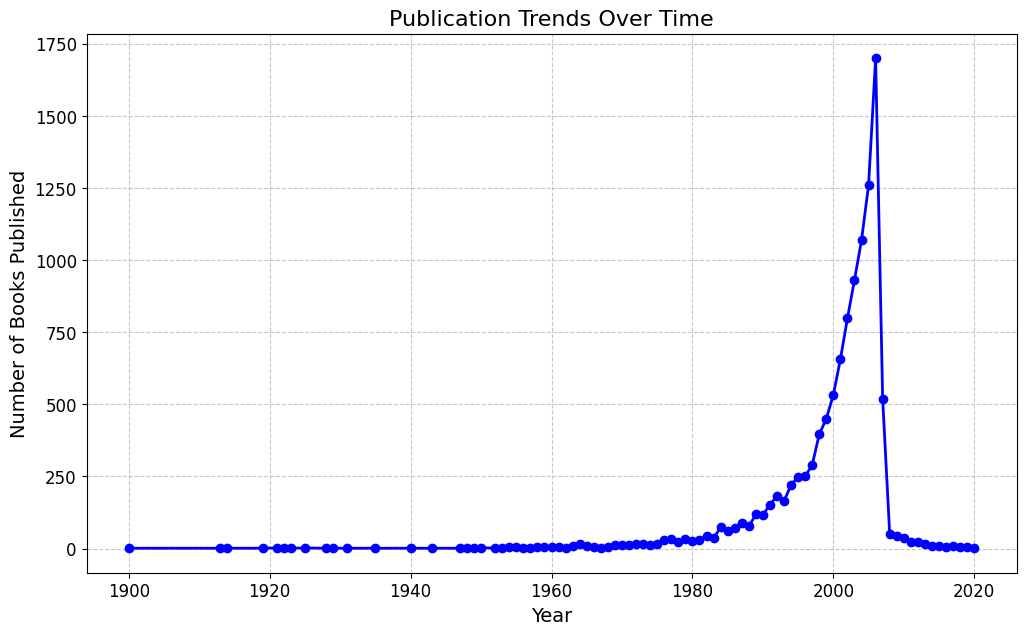

In [ ]:
# Publication Trends Over Time
plt.figure(figsize=(12, 7))
plt.plot(publication_trends.index, publication_trends.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Books Published', fontsize=14)
plt.title('Publication Trends Over Time', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

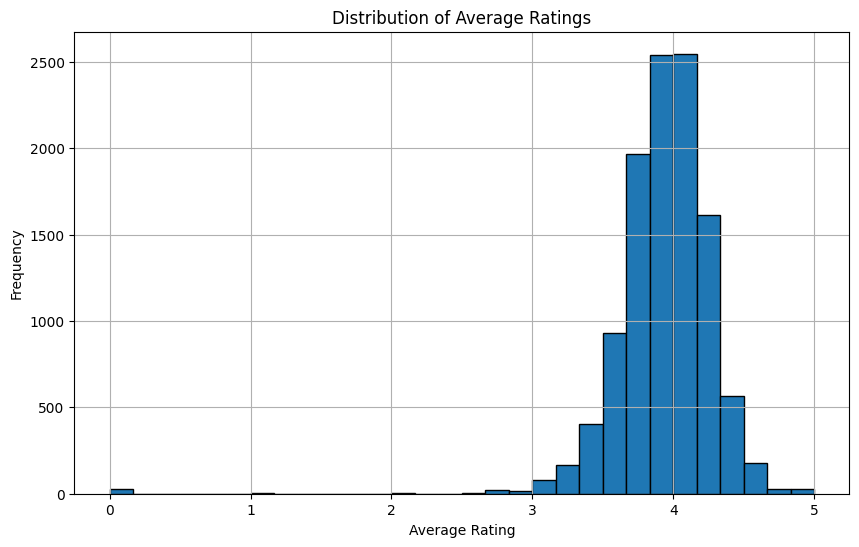

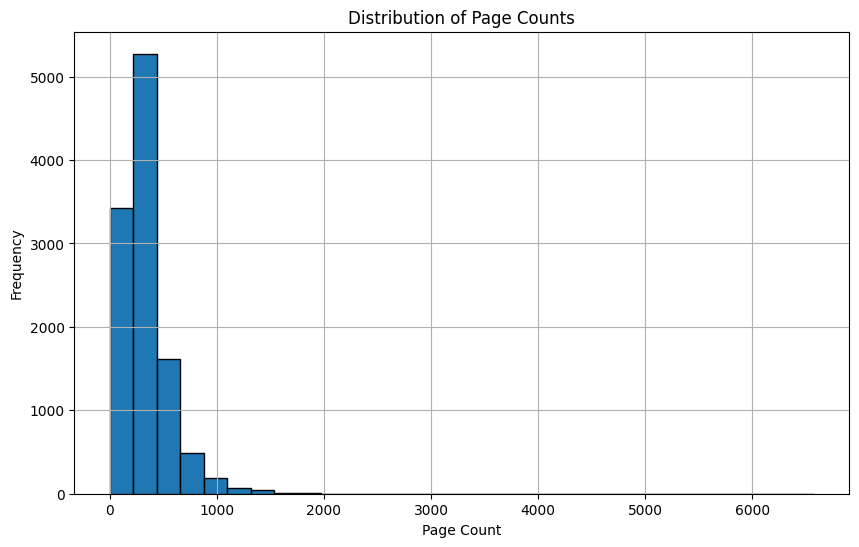

In [ ]:
# 3. Distribution of Ratings and Page Counts
ratings_distribution = cleaned_data['average_rating']
page_count_distribution = cleaned_data['num_pages']

# Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings_distribution.dropna(), bins=30, edgecolor='k')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.grid()
plt.show()

# Page Count Distribution
plt.figure(figsize=(10, 6))
plt.hist(page_count_distribution.dropna(), bins=30, edgecolor='k')
plt.xlabel('Page Count')
plt.ylabel('Frequency')
plt.title('Distribution of Page Counts')
plt.grid()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# 4. Top 10 Books by Language code
books_by_language = cleaned_data['language_code'].value_counts().sort_values(ascending=False).head(10)

books_by_language



,count
language_code,
eng,8908
en-US,1408
spa,218
en-GB,214
fre,144
ger,99
jpn,46
mul,19
zho,14


In [ ]:
# 5. Books by Publisher
books_by_publisher = cleaned_data['publisher'].value_counts().head(10).sort_values(ascending=False)
books_by_publisher

,count
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
Harper Perennial,112
HarperCollins,112
Pocket Books,111
Bantam,110
